In [58]:
import pandas as pd
import numpy as pn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

plt.style.use('seaborn')

df = pd.read_csv('wells.csv').drop(columns = 'index')
df.head()

,y,dist100,arsenic,educ4,assoc
0,1,0.16826,2.36,0.0,0
1,1,0.47322,0.71,0.0,0
2,0,0.20967,2.07,2.5,0
3,1,0.21486,1.15,3.0,0
4,1,0.40874,1.10,3.5,1


In [2]:
print(f"shape {df.shape}")
print(f"nulos = {df.isnull().sum().sum()}")

shape (3020, 5)
nulos = 0


C:\Users\silva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\silva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\silva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

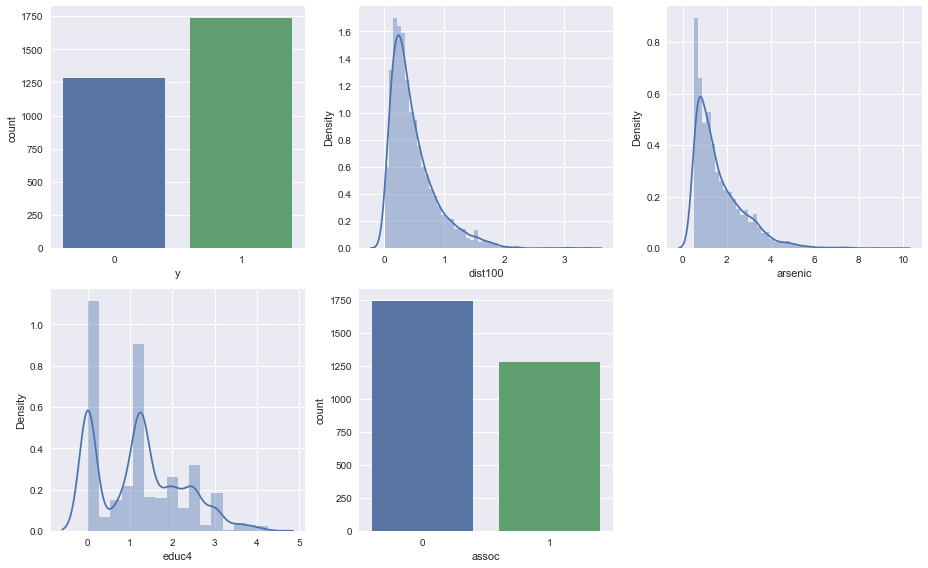

In [3]:
plt.rcParams['figure.figsize'] = (13,8)

j = 0
for i in df.columns:
    plt.subplot(2, 3, j+1)
    if len(df[i].value_counts()) > 2:
        sns.distplot(df[i])
    else:
        sns.countplot(x = df[i])
    j += 1
    plt.tight_layout()
    

In [4]:
#plt.subplot(1,1,1)
#sns.countplot(x = df['y'])
#sns.displot(x =df['dist100'])

In [5]:
round(df.corr(),2)

,y,dist100,arsenic,educ4,assoc
y,1.00,-0.12,0.18,0.08,-0.04
dist100,-0.12,1.00,0.18,-0.03,-0.00
arsenic,0.18,0.18,1.00,-0.03,-0.02
educ4,0.08,-0.03,-0.03,1.00,-0.03
assoc,-0.04,-0.00,-0.02,-0.03,1.00


In [6]:
m1_ols = smf.ols('y ~ dist100', data = df).fit()

In [7]:
m1_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     42.57
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           7.95e-11
Time:                        19:34:00   Log-Likelihood:                -2136.2
No. Observations:                3020   AIC:                             4276.
Df Residuals:                    3018   BIC:                             4288.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6484      0.014     45.194      0.000       0.620       0.677
dist100       -0.1515      0.023     -6.525      0.000      -0.197      -0.106
==============================================================================
Omnibus:                    11769.028   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              478.263
Skew:                          -0.305   Prob(JB):                    1.40e-104
Kurtosis:                       1.148   Cond. No.                         3.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
m1_logit = smf.logit('y ~ dist100', data = df).fit()
m1_logit.summary()

Optimization terminated successfully.
         Current function value: 0.674874
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3020
Model:                          Logit   Df Residuals:                     3018
Method:                           MLE   Df Model:                            1
Date:                Mon, 30 Aug 2021   Pseudo R-squ.:                 0.01017
Time:                        19:34:00   Log-Likelihood:                -2038.1
converged:                       True   LL-Null:                       -2059.0
Covariance Type:            nonrobust   LLR p-value:                 9.798e-11
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6060      0.060     10.047      0.000       0.488       0.724
dist100       -0.6219      0.097     -6.383      0.000      -0.813      -0.431
==============================================================================
"""

In [9]:
#m2_logit desde sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(
    StandardScaler().fit_transform(df.drop(columns = 'y')),df['y'], test_size = 0.33, random_state =11238) ##OJO con el StandardScaler().fit_transform(X)

In [10]:
m2_logit = LogisticRegression().fit(x_train, y_train)
m2_logit.coef_

array([[-0.33506445,  0.59190216,  0.14152063, -0.05189578]])

In [11]:
y_predict = m2_logit.predict(x_test)
m2_logit.score(x_test,y_test) # Es lo mismo que el accuracy

0.6308926780341023

In [12]:
from sklearn.metrics import r2_score

r2_score(y_predict,y_test.values)

-0.7751715195324218

In [13]:
# NO TIENE SENTIDO SCORE, porque la variable objetivo es DISCRETA

In [27]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_predict, normalize = 'true'))
confusion_matrix(y_test,y_predict)

[[0.41232227 0.58767773]
 [0.20869565 0.79130435]]


array([[174, 248],
       [120, 455]], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_predict)
acc # Lo mismo que m2_logit.score(x_test,y_test)

0.6308926780341023

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.59      0.41      0.49       422
           1       0.65      0.79      0.71       575

    accuracy                           0.63       997
   macro avg       0.62      0.60      0.60       997
weighted avg       0.62      0.63      0.62       997



In [54]:
from sklearn.metrics import roc_curve, plot_roc_curve

y_predict_proba = m2_logit.predict_proba(x_test)[:,1]

#false_positive, true_positive, threshold = roc_curve(y_test, y_predict_proba)

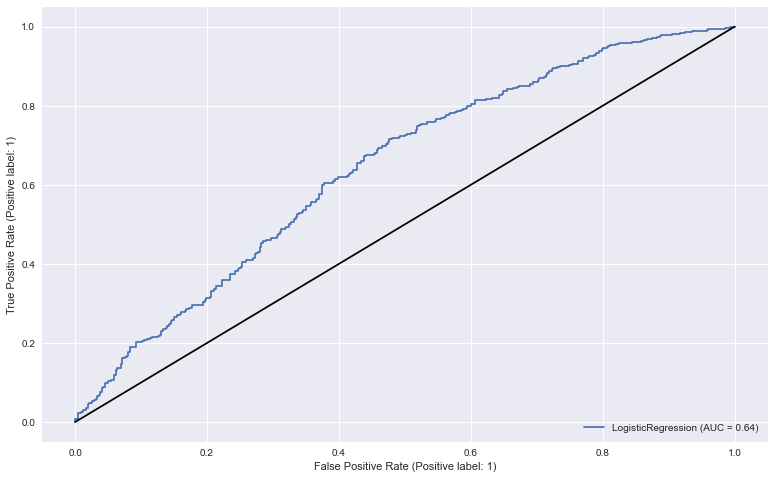

In [55]:
plot_roc_curve(m2_logit, x_test,y_test, 
plt.plot([0,1], color = 'black')

In [72]:
from sklearn.model_selection import cross_val_score

m2_cv = cross_val_score(LogisticRegression(),
               X = df[['dist100','assoc']],
               y = df['y'],
               scoring = 'f1',
               cv = 30)

In [74]:
(m2_cv.mean(),m2_cv.std())

(0.7151916789247537, 0.056692795035055504)

In [75]:
m2_cv.std()/m2_cv.mean()

0.07926937170226814

In [80]:
from sklearn.model_selection import LeaveOneOut

m2_loo = cross_val_score(LogisticRegression(),
               X = df[['dist100','assoc']],
               y = df['y'],
               scoring = 'accuracy',
               cv = LeaveOneOut())

In [81]:
m2_loo.mean() #Pencalawea

0.590728476821192

In [82]:
m2_loo.std()

0.4916994442682505